## Import Library

In [48]:
import pymongo
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

## Load Data From MongoDB

In [5]:
# Load data dari Database MongoDB 
myClient = pymongo.MongoClient("mongodb://localhost:27017")
myDatabase = myClient.iStorage
myCollection = myDatabase.backup_dataset

In [6]:
# 7 kategori artikel berita yang ada di dalam database
categories = ['news', 'bisnis', 'sports', 'entertainment', 'tekno', 'otomotif', 'health']

In [7]:
# Array yang digunakan untuk menampung data berdasarkan kategori
polhukam,bisnis,olahraga,hiburan,teknologi,otomotif,kesehatan = [],[],[],[],[],[],[]

In [8]:
# fungsi ambil data berdasarkan category
def getQuery(category=None):
    iQuery = myCollection.find(
        {"category": "{}".format(category)}, 
        {
            "category": 1, 
            "title": 1,
            "url": 1,
            "cleanContent": 1
        }).limit(15000)
    
    return iQuery

In [9]:
# fungsi input data ke list
def setData(iQuery=None):
    category = []
    for query in iQuery: category.append(query)
        
    return category

In [10]:
iData = []

In [11]:
# Ambil data dari Database dan disimpan di array berdasarkan kategori
####################################
iQuery = getQuery("news")
polhukam = setData(iQuery)
for data in tqdm(polhukam): iData.append(data)
####################################
iQuery = getQuery("bisnis")
bisnis = setData(iQuery)
for data in tqdm(bisnis): iData.append(data)
####################################
iQuery = getQuery("sports")
olahraga = setData(iQuery)
for data in tqdm(olahraga): iData.append(data)
####################################
iQuery = getQuery("entertainment")
hiburan = setData(iQuery)
for data in tqdm(hiburan): iData.append(data)
####################################
iQuery = getQuery("tekno")
teknologi = setData(iQuery)
for data in tqdm(teknologi): iData.append(data)
####################################
iQuery = getQuery("otomotif")
otomotif = setData(iQuery)
for data in tqdm(otomotif): iData.append(data)
####################################
iQuery = getQuery("health")
kesehatan = setData(iQuery)
for data in tqdm(kesehatan): iData.append(data)

100%|██████████| 15000/15000 [00:00<00:00, 2000781.05it/s]


In [12]:
# Dataframe Categories
df = pd.DataFrame({
    'Nama Kategori':[
        'Polhukam','Bisnis','Olahraga','Hiburan','Teknologi','Otomotif','Kesehatan'],
    'Jumlah Data':[
        len(polhukam),
        len(bisnis),
        len(olahraga),
        len(hiburan),
        len(teknologi),
        len(otomotif),
        len(kesehatan)
    ]
})
df.loc['Total'] = pd.Series(df['Jumlah Data'].sum(), index = ['Jumlah Data'])
df

,Nama Kategori,Jumlah Data
0,Polhukam,15000.0
1,Bisnis,15000.0
2,Olahraga,15000.0
3,Hiburan,15000.0
4,Teknologi,15000.0
5,Otomotif,15000.0
6,Kesehatan,15000.0
Total,NaN,105000.0


## Konversi Data ke DataFrame (Pandas)

In [13]:
shuffle(iData)

In [14]:
df = pd.DataFrame(iData)

In [15]:
df.tail()

,_id,category,title,url,cleanContent
104995,5dad488c2cce79de7ceefe3f,tekno,"Gempa di Sukabumi Terasa hingga Jakarta, Ini R...",https://www.liputan6.com/tekno/read/3866072/ge...,gempa bumi wilayah wilayah jawa barat tepatnya...
104996,5d6e54da52025bb1853b5559,otomotif,Race Engineer Kimi Raikkonen Tinggalkan Ferrari,https://otomotif.tempo.co/read/1048485/race-en...,race engineer kimi raikkonen david greenwood r...
104997,5d6cdaf6ed097bf288768f85,entertainment,Elly Sugigi Ganti Nama Putrinya yang Ikut Jadi...,https://seleb.tempo.co/read/1207029/elly-sugig...,putri elly sugigi ulfi damayanti mengikuti jej...
104998,5d8dafe443386a8f86d26f68,tekno,Viral Guru Mengajar Microsoft Word dengan Papa...,https://tekno.kompas.com/read/2018/03/19/07420...,foto guru tik teknologi informasi komunikasi g...
104999,5d6bd88edfdedb563e1c88fe,news,Presiden Xi Jinping Klaim Modernisasi AL Cina ...,https://dunia.tempo.co/read/1198437/presiden-x...,presiden cina xi jinping rakyat mencintai perd...


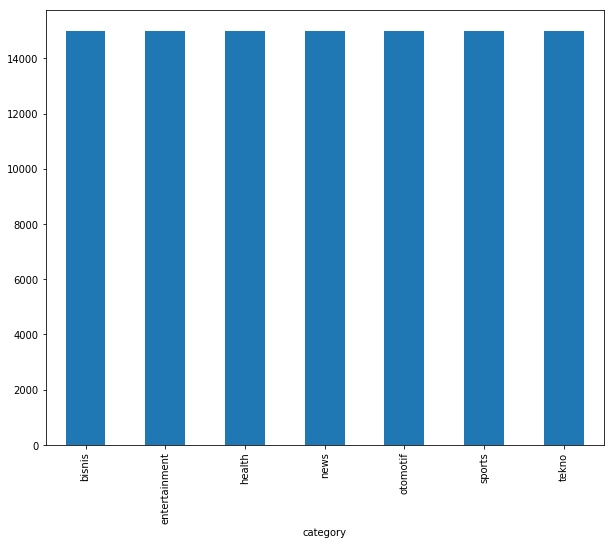

In [16]:
fig = plt.figure(figsize=(10,8))
df.groupby('category').title.count().plot.bar(ylim=0)
plt.show()

## Menggunakan Metode Naive Bayes

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [94]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [95]:
nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [102]:
print(nb.score(X_train, y_train))

0.9664


In [99]:
y_pred = nb.predict(X_test)

In [100]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print('=========================\n')
print(classification_report(y_test, y_pred,target_names=categories))

Table Confusion Matrix

Accuracy 0.9598095238095238

               precision    recall  f1-score   support

         news       0.92      0.96      0.94      3703
       bisnis       0.96      0.97      0.97      3843
       sports       0.97      0.93      0.95      3855
entertainment       0.93      0.97      0.95      3650
        tekno       0.98      0.97      0.98      3788
     otomotif       0.99      0.97      0.98      3655
       health       0.98      0.94      0.96      3756

  avg / total       0.96      0.96      0.96     26250



In [18]:
import textacy
from sklearn.naive_bayes import MultinomialNB
from textacy.preprocess import preprocess_text
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf = TfidfVectorizer(min_df=1, max_df=0.25)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['cleanContent'], df['category'])

In [21]:
X1 = tfidf.fit_transform(X_train)

In [24]:
X1.shape

(78750, 210764)

In [25]:
print('X_traint : {}'.format(len(X_train)))
print('X_test   : {}'.format(len(X_test)))
print('Total    : {}'.format(len(X_train) + len(X_test)))

X_traint : 78750
X_test   : 26250
Total    : 105000


In [26]:
clf = MultinomialNB().fit(X1, y_train)

In [27]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = clf.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [28]:
new_title = '''Arifin Ilham Sakit, Ini 7 Tips Bantuan Saat Kerabat Sakit'''

In [29]:
print(get_categoryMNB(new_title))

['entertainment']


In [30]:
print(clf.score(X1, y_train))

0.9662984126984127


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()

In [32]:
model = make_pipeline(TfidfVectorizer(min_df=1, max_df=0.25), MultinomialNB())

In [33]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [38]:
print("Table Confusion Matrix")
print("=========================\n")
print('Accuracy %s' % accuracy_score(labels, y_test))
print('=========================\n')
print(classification_report(y_test, labels,target_names=categories))

Table Confusion Matrix

Accuracy 0.9595428571428571

               precision    recall  f1-score   support

         news       0.92      0.96      0.94      3703
       bisnis       0.96      0.97      0.96      3843
       sports       0.97      0.93      0.95      3855
entertainment       0.93      0.97      0.95      3650
        tekno       0.98      0.97      0.98      3788
     otomotif       0.99      0.97      0.98      3655
       health       0.98      0.94      0.96      3756

  avg / total       0.96      0.96      0.96     26250



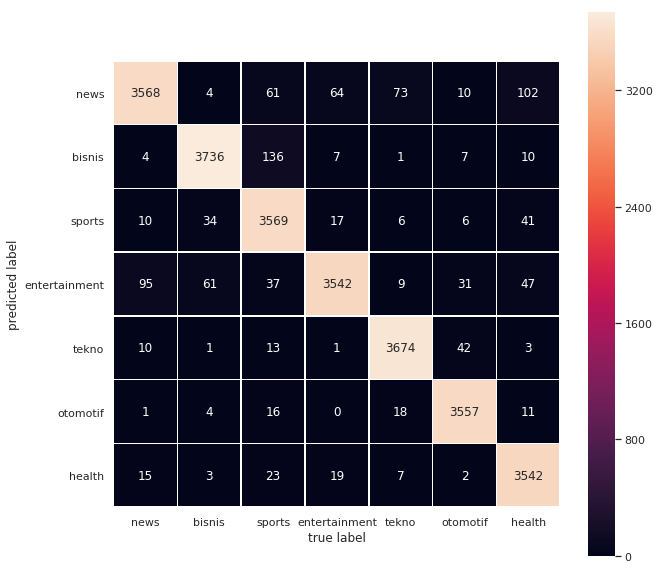

In [39]:
mat = confusion_matrix(y_test, labels)
f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,linewidths=.6, ax=ax,
            xticklabels=categories, yticklabels=categories)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Pengujian

In [61]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textacy.preprocess import preprocess_text
from IPython.core.display import HTML
from IPython.display import Image
from bs4 import BeautifulSoup
import requests
import id_aldo

In [50]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [51]:
# Load Model id_aldo
nlp = id_aldo.load()

stopwords = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text.split("\n")


In [54]:
class Pengujian():
    
    def __init__(self):
        self
        
    def nerText(self, text=None):
        doc = nlp(text)
        count = 0
        for ent in doc.ents:
            if ent.end <= 5:
                count = ent.end_char + 1
            else:
                count = len(text)

        iResult = text[count:].strip()

        return iResult
        
    def tempoArticle(self, link=None):
        iData, text_stopword, tempCF = [],[],[]
        formatCF = ['url', 'number', 'usd', 'email']
        
        response = requests.get(link).text
        soup = BeautifulSoup(response, "html5lib")
        title = soup.select_one('article > h1').text.strip()
        image = soup.select_one('figure > a')['href']
        contents = soup.select('#isi > p')
        
        for content in contents:
            if content.text.strip()[:10] != 'Baca juga:' and content.text.strip()[:5] != 'Baca:':
                iData.append(content.text.strip() + '\n\n')

        articles = ''.join(iData)
        format = self.nerText(articles)
        caseFolding = preprocess_text(format, fix_unicode=True, lowercase=True, no_urls=True,no_emails=True,
                                no_phone_numbers=True,no_numbers=True,no_currency_symbols=True,no_punct=True)
        caseFolding = caseFolding.split()
        [tempCF.append(cf) for cf in caseFolding if cf not in formatCF]
        caseFolding = ' '.join(tempCF)

        stopword = caseFolding.split()
        [text_stopword.append(st) for st in stopword if st not in stopwords]
        stopword = ' '.join(text_stopword)

        stemming = stemmer.stem(stopword)

        json = {
            'title' : title,
            'image' : image,
            'article' : articles,
            'source' : 'Tempo',
            'caseFolding' : caseFolding,
            'stopword' : stopword,
            'stemming' : stemming
        }

        return json
    
    def kompasArticle(self, link=None):
        iData, text_stopword, tempCF = [],[],[]
        formatCF = ['url', 'number', 'usd', 'email']

        response = requests.get(link).text
        soup = BeautifulSoup(response, "html5lib")
        # if link.split('.')[0].split('//')[1] == 'money'

        title = soup.select_one('.read__title').text.strip()
        image = soup.select_one('.photo > img')['data-src']
        contents = soup.select('.read__content > p')

        for i in range(len(contents)):
            if contents[i].text != '':
                if (contents[i].text[:9] != 'Baca juga' and contents[i].text[:5] != 'Baca:') \
                        and (contents[i].text[:15] != 'We are thrilled') and (contents[i].text[:6] != 'Flinke') \
                        and (contents[i].text[:18] != 'Baca selengkapnya:') and (contents[i].text[:25]) != 'Baca berita selengkapnya:' \
                        and (contents[i].text[:7]) != 'Sumber:':
                    iData.append(contents[i].text  + '\n\n')

        articles = ''.join(iData)
        format = self.nerText(articles)
        caseFolding = preprocess_text(format, fix_unicode=True, lowercase=True, no_urls=True,no_emails=True,
                                no_phone_numbers=True,no_numbers=True,no_currency_symbols=True,no_punct=True)
        caseFolding = caseFolding.split()
        [tempCF.append(cf) for cf in caseFolding if cf not in formatCF]
        caseFolding = ' '.join(tempCF)

        stopword = caseFolding.split()
        [text_stopword.append(st) for st in stopword if st not in stopwords]
        stopword = ' '.join(text_stopword)

        stemming = stemmer.stem(stopword)

        json = {
            'title' : title,
            'image' : image,
            'article' : articles,
            'source' : 'Kompas',
            'caseFolding' : caseFolding,
            'stopword' : stopword,
            'stemming' : stemming
        }

        return json
    
    def testing(self, link=None):
        if link.split('.')[1] == 'tempo': result = self.tempoArticle(link)
        elif link.split('.')[1] == 'kompas': result = self.kompasArticle(link)
                
        return result

In [55]:
uji = Pengujian()

In [83]:
url = '''https://cantik.tempo.co/read/1273625/potret-selvi-ananda-saat-hamil-trimester-tiga-di-depan-istana'''

In [84]:
hasil = uji.testing(url)

In [85]:
hasil_prediksi = clf.predict(tfidf.transform([hasil['stemming']]))

In [86]:
print()
print('Hasil Pengujian')
print('============================')
print('Judul Berita : ' + hasil['title'] + '\n')
print('Hasil Kategori ')
print('============================')
print(hasil_prediksi)
Image(url= hasil['image'], width=500, height=500)


Hasil Pengujian
Judul Berita : Potret Selvi Ananda saat Hamil Trimester Tiga di Depan Istana

Hasil Kategori 
['entertainment']


## Save Model Naive Bayes MultinomialNB

In [37]:
import pickle

In [50]:
pkl_filename = 'modelMNB.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(modelMNB, file)

In [51]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [54]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(X1, y_train)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(X1)

Test score: 91.58 %


In [55]:
def get_categoryMNB(text):
    result_cleanText = textacy.preprocess_text(text,lowercase=True,no_urls=True,no_numbers=True,no_punct=True)
    hasil_prediksi = pickle_model.predict(tfidf.transform([result_cleanText]))
    return hasil_prediksi

In [56]:
title = '''Waspadalah, Stroke Kini Sudah Menyerang Orang Usia 30-an'''

In [59]:
print(get_categoryMNB(title)[0])

health


## Joblib

In [10]:
from sklearn.externals import joblib

In [126]:
joblib.dump(modelMNB, 'model_joblib')

['model_joblib']

In [127]:
mj = joblib.load('model_joblib')

In [128]:
mj.score(X1, y_train)

0.8939410971223022

In [129]:
mj.predict(tfidf.transform([new_title]))

array(['entertainment'], dtype='<U13')

## Testing

In [108]:
import requests
from bs4 import BeautifulSoup

In [87]:
url = '''https://newsapi.org/v2/top-headlines?country=id&apiKey=3bb4bf323f7f43d3aaafb6bd5cd26c92'''

In [88]:
response = requests.get(url).json()

In [89]:
response

{'status': 'ok',
 'totalResults': 38,
 'articles': [{'source': {'id': None, 'name': 'Grid.id'},
   'author': None,
   'title': 'Baru Seminggu Pendaftarannya Dibuka, BKN Sudah Temukan Dugaan Kecurangan CPNS 2019, Fitur Ini Sampai Dihila... - GridHot.ID',
   'description': 'Pihak BKN sendiri menemukan adanya indikasi kecurang di pendaftaran CPNS 2019. Fitur yang satu ini langsung dihilangkan BKN.',
   'url': 'https://hot.grid.id/read/181922460/baru-seminggu-pendaftarannya-dibuka-bkn-sudah-temukan-dugaan-kecurangan-cpns-2019-fitur-ini-sampai-dihilangkan-di-portal',
   'urlToImage': 'https://asset-a.grid.id/crop/0x0:0x0/700x465/photo/2019/11/11/2184818268.jpg',
   'publishedAt': '2019-11-18T05:52:23Z',
   'content': 'Laporan Wartawan Gridhot.ID, Angriawan Cahyo Pawenang\r\nGridhot.ID -Pendaftaranseleksi Calon Pegawai Negeri Sipil (CPNS) 2019 telah resmi dibuka.\r\nDikutip Gridhot dari Tribunnews, pendaftaranCPNS sudah dibuka sekitar seminggu sejak Senin (11/11/2019).\r\nPara pe… [+803 char

In [90]:
temp = []
for r in response['articles']:
    print(r['source'])
    temp.append(r)

{'id': None, 'name': 'Grid.id'}
{'id': None, 'name': 'Katadata.co.id'}
{'id': None, 'name': 'Suara.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Idntimes.com'}
{'id': None, 'name': 'Idntimes.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Bolasport.com'}
{'id': None, 'name': 'Kapanlagi.com'}
{'id': None, 'name': 'Cnnindonesia.com'}
{'id': None, 'name': 'Detik.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Okezone.com'}
{'id': None, 'name': 'Bola.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Kompas.com'}
{'id': None, 'name': 'Suara.com'}


In [91]:
temp

[{'source': {'id': None, 'name': 'Grid.id'},
  'author': None,
  'title': 'Baru Seminggu Pendaftarannya Dibuka, BKN Sudah Temukan Dugaan Kecurangan CPNS 2019, Fitur Ini Sampai Dihila... - GridHot.ID',
  'description': 'Pihak BKN sendiri menemukan adanya indikasi kecurang di pendaftaran CPNS 2019. Fitur yang satu ini langsung dihilangkan BKN.',
  'url': 'https://hot.grid.id/read/181922460/baru-seminggu-pendaftarannya-dibuka-bkn-sudah-temukan-dugaan-kecurangan-cpns-2019-fitur-ini-sampai-dihilangkan-di-portal',
  'urlToImage': 'https://asset-a.grid.id/crop/0x0:0x0/700x465/photo/2019/11/11/2184818268.jpg',
  'publishedAt': '2019-11-18T05:52:23Z',
  'content': 'Laporan Wartawan Gridhot.ID, Angriawan Cahyo Pawenang\r\nGridhot.ID -Pendaftaranseleksi Calon Pegawai Negeri Sipil (CPNS) 2019 telah resmi dibuka.\r\nDikutip Gridhot dari Tribunnews, pendaftaranCPNS sudah dibuka sekitar seminggu sejak Senin (11/11/2019).\r\nPara pe… [+803 chars]'},
 {'source': {'id': None, 'name': 'Katadata.co.id'},


In [92]:
for t in temp:
    print(t['title'])
    print(t['url'])
    print('=========================\n')
    print(get_categoryMNB(t['title']))
    print('=========================\n')

Baru Seminggu Pendaftarannya Dibuka, BKN Sudah Temukan Dugaan Kecurangan CPNS 2019, Fitur Ini Sampai Dihila... - GridHot.ID
https://hot.grid.id/read/181922460/baru-seminggu-pendaftarannya-dibuka-bkn-sudah-temukan-dugaan-kecurangan-cpns-2019-fitur-ini-sampai-dihilangkan-di-portal

['tekno']

Setelah Instagram, Giliran TikTok Luncurkan Fitur Belanja - Katadata.co.id
https://katadata.co.id/berita/2019/11/18/setelah-instagram-giliran-tiktok-luncurkan-fitur-belanja

['tekno']

Ditemukan Bintang Melaju Super Cepat di Galaksi Bima Sakti - Suara.com
https://www.suara.com/tekno/2019/11/18/120500/ditemukan-bintang-melaju-super-cepat-di-galaksi-bima-sakti

['tekno']

Massa Demo Tolak Pemakaman Pelaku Bom Bunuh Diri di Medan - detikNews
https://news.detik.com/berita/d-4788644/massa-demo-tolak-pemakaman-pelaku-bom-bunuh-diri-di-medan

['news']

Huawei Mate 30 Pro Tak Ada Aplikasi Google, Ini Sistem yang Digunakan - Duniaku.com
https://duniaku.idntimes.com/tekno/gadgets/dimas-ramadhan-2/huawei-mate-